# Sales Data Analysis

## Ingest

In [43]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
print("hello world")


hello world


In [44]:
# get data for all files with their paths

directory_path = f"{os.getcwd()}/data"
files = []

for filename in os.listdir(directory_path):
    if os.path.isfile(os.path.join(directory_path, filename)):
        files.append(filename)

print(files[:5])


['sales_week_starting_2013-01-07.csv', 'sales_week_starting_2012-12-24.csv', 'sales_week_starting_2012-12-31.csv', 'sales_week_starting_2013-04-22.csv', 'sales_week_starting_2012-10-08.csv']


In [45]:
# go through all csv files and create a single dataframe
df = pd.DataFrame()

for file in files:
    temp_df = pd.read_csv(f"data/{file}")

    df = pd.concat([temp_df, df], ignore_index=True)


In [46]:
df.head()


,sale_time,purchaser_gender
0,2013-08-12 01:10:47,male
1,2013-08-12 02:07:00,female
2,2013-08-12 02:09:54,male
3,2013-08-12 02:16:23,male
4,2013-08-12 02:23:33,female


## EDA

### get descriptive stats about the data

In [47]:
df


,sale_time,purchaser_gender
0,2013-08-12 01:10:47,male
1,2013-08-12 02:07:00,female
2,2013-08-12 02:09:54,male
3,2013-08-12 02:16:23,male
4,2013-08-12 02:23:33,female
...,...,...
204324,2013-01-13 22:23:42,female
204325,2013-01-13 22:24:26,female
204326,2013-01-13 22:29:54,female
204327,2013-01-13 22:56:41,female


### Plot daily sales for all 50 weeks.


In [48]:
# first convert the date column to proper datetime format
df["sale_time"] = pd.to_datetime(df["sale_time"])
df.head()


,sale_time,purchaser_gender
0,2013-08-12 01:10:47,male
1,2013-08-12 02:07:00,female
2,2013-08-12 02:09:54,male
3,2013-08-12 02:16:23,male
4,2013-08-12 02:23:33,female


In [49]:
# extract the year, week and day into separate columns
df[["year", "week", "day"]] = df["sale_time"].dt.isocalendar()
df.head()


,sale_time,purchaser_gender,year,week,day
0,2013-08-12 01:10:47,male,2013,33,1
1,2013-08-12 02:07:00,female,2013,33,1
2,2013-08-12 02:09:54,male,2013,33,1
3,2013-08-12 02:16:23,male,2013,33,1
4,2013-08-12 02:23:33,female,2013,33,1


In [52]:
# get date column
df["date"] = pd.to_datetime(df["sale_time"].dt.date)
df.head()


,sale_time,purchaser_gender,year,week,day,date
0,2013-08-12 01:10:47,male,2013,33,1,2013-08-12
1,2013-08-12 02:07:00,female,2013,33,1,2013-08-12
2,2013-08-12 02:09:54,male,2013,33,1,2013-08-12
3,2013-08-12 02:16:23,male,2013,33,1,2013-08-12
4,2013-08-12 02:23:33,female,2013,33,1,2013-08-12


In [53]:
df[["week", "date"]].value_counts().sort_index(level=0).head(30)


week  date      
1     2012-12-31    538
      2013-01-01    458
      2013-01-02    532
      2013-01-03    510
      2013-01-04    536
      2013-01-05    497
      2013-01-06    497
2     2013-01-07    550
      2013-01-08    494
      2013-01-09    445
      2013-01-10    536
      2013-01-11    409
      2013-01-12    469
      2013-01-13    472
3     2013-01-14    458
      2013-01-15    517
      2013-01-16    521
      2013-01-17    522
      2013-01-18    519
      2013-01-19    547
      2013-01-20    474
4     2013-01-21    521
      2013-01-22    503
      2013-01-23    491
      2013-01-24    514
      2013-01-25    504
      2013-01-26    484
      2013-01-27    445
5     2013-01-28    453
      2013-01-29    533
Name: count, dtype: int64

<Axes: xlabel='date'>

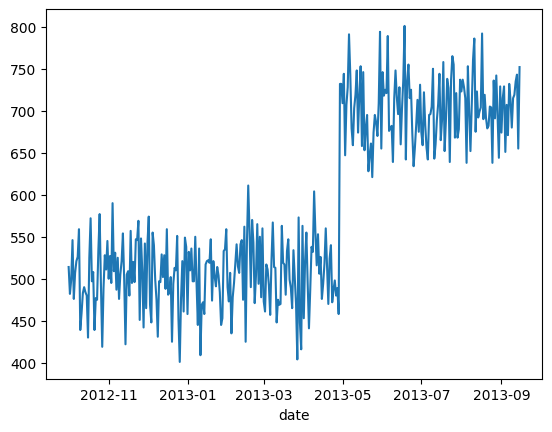

In [63]:
# plot sales for all days
df["date"] = df["sale_time"].dt.date
(
    df.sort_values("sale_time", ascending=True).groupby("date").size().plot()
)


### It looks like there has been a sudden change in daily sales. What date did it occur?


In [65]:
df.head()


,sale_time,purchaser_gender,year,week,day,date
0,2013-08-12 01:10:47,male,2013,33,1,2013-08-12
1,2013-08-12 02:07:00,female,2013,33,1,2013-08-12
2,2013-08-12 02:09:54,male,2013,33,1,2013-08-12
3,2013-08-12 02:16:23,male,2013,33,1,2013-08-12
4,2013-08-12 02:23:33,female,2013,33,1,2013-08-12


<Axes: xlabel='date'>

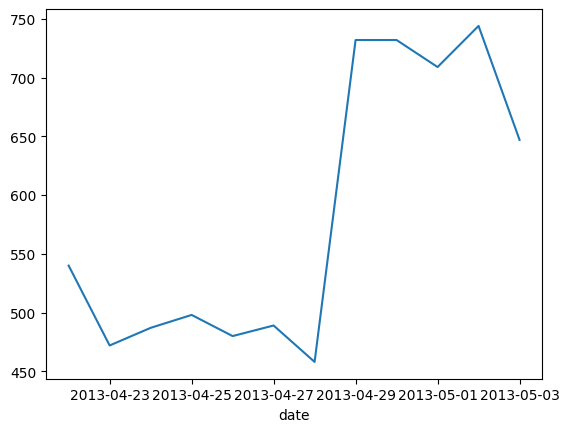

In [82]:
# from the plot above we can see that there is a change on 2013-05, so get data from 03-07
mask1 = pd.to_datetime(df["date"]).between("2013-04-22", "2013-05-03")
df["date"] = df["sale_time"].dt.date
(
    df[mask1].sort_values("sale_time", ascending=True).groupby(
        "date").size().plot()
)

# the


### Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?


### Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).


### Assume a given day is divided into four dayparts:


night (12:00AM - 6:00AM),
morning (6:00AM - 12:00PM),
afternoon (12:00PM - 6:00PM),
evening (6:00PM - 12:00AM).
### What is the percentage of sales in each daypart over all 50 weeks?

## Conclusion